
# PCMDI Metrics Package Sea Ice Demo
## _Supplementary: Explore the Sea Ice Data_


<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/100px-PCMDI-Logo-NoText-square-png8.png"
         width="65"
         style="margin-right: 30px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/480px-DOE_Seal_Color.png"
         width="65"
         style="margin-right: 30px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="65"
         style="margin-right: 30px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >
</p>
</div>

**Summary**  

In this notebook, we are going to explore the dataset used for the [PMP Sea Ice demo notebook](Demo_9_seaIceExtent_ivanova.ipynb). Let's explore the sea ice data for fun!


**Notebook Authors**: Jiwoo Lee, Ana Ordonez, Paul Durack, Peter Gleckler ([PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

## 1. Environment setup

We will use multiple libraries for this analysis.

- [xCDAT](https://xcdat.readthedocs.io): an open source Python tool developed based on the xarray to ease climate data analysis. The [xCDAT](https://xcdat.readthedocs.io) is an extension of [xarray](https://xarray.dev/) for climate data analysis on structured grids.
- [numpy](https://numpy.org): needed for calculating the metrics.
- [matplotlib](https://matplotlib.org/) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/): required for data visualizations.

In [1]:
import xcdat as xc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Optional packages for interactive visualization

- [hvplot](https://hvplot.holoviz.org/): this tool used for 2-D interactive plots. Following optional packages are also required for interactive visualizations: [geoviews](https://geoviews.org) and [jupyter_bokeh](https://github.com/bokeh/jupyter_bokeh).
- [lexcube](https://www.lexcube.org): 3-D interactive visualization.

To install them, delete the triple quotations on lines 2&4 from below cell and install with pip:

In [2]:
"""
!pip install hvplot geoviews jupyter_bokeh
"""

'\n!pip install hvplot geoviews jupyter_bokeh\n'

In [3]:
"""
!pip install lexcube
"""

'\n!pip install lexcube\n'

In [4]:
import hvplot.xarray

## 2. Data

### 2.1 Model output data

#### 2.1.1 Load dataset

This demo uses one of CMIP6 models -- E3SM-1-0. The Sea-Ice Area Percentage (Ocean Grid; 'siconc') and Grid-Cell Area for Ocean Variables ('areacello') variables are needed and can be found in the following directories. In addition, six other models are available that can be added to the analyses in this demo:
```
/p/user_pub/pmp/demo/sea-ice/links_siconc
/p/user_pub/pmp/demo/sea-ice/links_area
```

This data can be found from ESGF (https://esgf-node.llnl.gov/). 
- e.g., Search query: https://aims2.llnl.gov/search?project=CMIP6&activeFacets={"experiment_id":"historical","variable_id":"siconc"}

In [5]:
!ls /p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc

siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_185001-185912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_186001-186912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_187001-187912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_188001-188912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_189001-189912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_190001-190912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_191001-191912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_192001-192912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_193001-193912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_194001-194912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_195001-195912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_196001-196912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_197001-197912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_198001-198912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_199001-199912.nc
siconc_SImon_E3SM-1-0_historical_r1i2p2f1_gr_200001-200912.nc
siconc_S

In [6]:
!ls /p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/

areacello_Ofx_E3SM-1-0_historical_r1i1p1f1_gr.nc


In [7]:
# Load model dataset
ds = xc.open_mfdataset(
    "/p/user_pub/pmp/demo/sea-ice/links_siconc/E3SM-1-0/historical/r1i2p2f1/siconc/siconc_SImon_E3SM-1-0_historical_r1i2p2f1_*_*.nc"
)
area = xc.open_dataset(
    "/p/user_pub/pmp/demo/sea-ice/links_area/E3SM-1-0/areacello_Ofx_E3SM-1-0_historical_r1i1p1f1_gr.nc"
)

2024-01-29 10:33:15,354 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


See what is in the dataset:

In [8]:
ds

<xarray.Dataset>
Dimensions:    (time: 1944, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    type       |S7 b'sea_ice'
  * time       (time) object 1850-01-16 12:00:00 ... 2011-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    siconc     (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    creation_date:          2023-01-30T21:36:30Z
    data contact:           Sam Stevenson (sstevenson@ucsb.edu)
    ...                     ...
    variant_label:          r1i2p2f1
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.7.0
    references:             Stevenson, S., Huang, X., Zhao, Y., Di Lorenzo, E...
    version:                v20230811
    branch_time_in_parent:  3560.0

In [9]:
area

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    areacello  (lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    creation_date:          2021-01-28T04:40:15Z
    ...                     ...
    title:                  E3SM-1-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/aaa3a5b2-c4c4-4bf6-b7a3-b59915926fc0
    variable_id:            areacello
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by E3SM is licensed und...
    cmor_version:           3.6.0

#### 2.1.2 Visualize the data

Let's get a quick look of the data snapshot to get an idea how it look like:

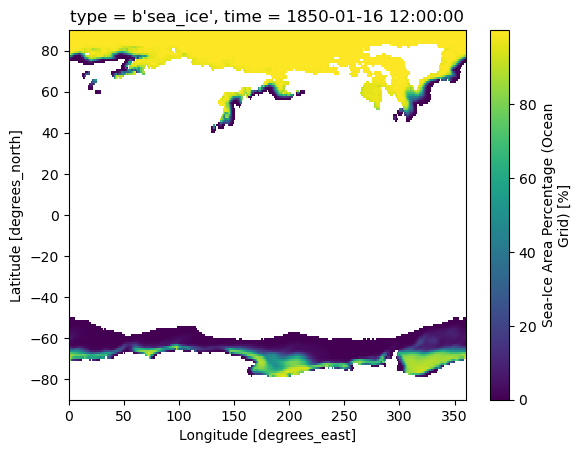

In [10]:
ds["siconc"].isel(time=0).plot()

In [11]:
ds["siconc"].isel(time=0).to_numpy()

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [99.87347 , 99.88154 , 99.88288 , ..., 99.86003 , 99.861336,
        99.86454 ],
       [99.656136, 99.65681 , 99.657486, ..., 99.655624, 99.65451 ,
        99.65535 ],
       [99.54839 , 99.55058 , 99.554344, ..., 99.54922 , 99.54881 ,
        99.54852 ]], dtype=float32)

Another angle view:
- Example map scripts are adapted and revised from https://docs.xarray.dev/en/latest/user-guide/plotting.html#maps.

In [12]:
from cartopy.feature import LAND as cartopy_land
from cartopy.feature import OCEAN as cartopy_ocean

Text(0.5, 1.0, 'sea ice concentration over the polar region')

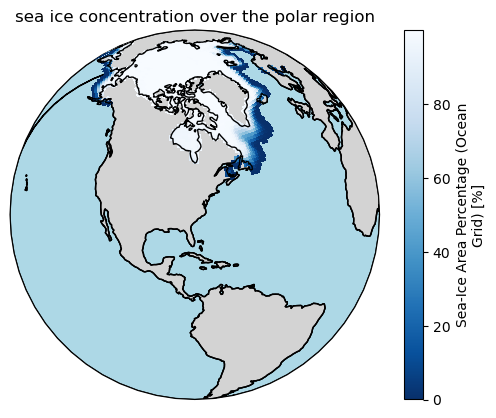

In [13]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))

ax.set_global()

# Color over the ocean
ax.add_feature(cartopy_ocean, zorder=1, edgecolor="k", facecolor="lightblue")

# Data
ds["siconc"].isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap="Blues_r", zorder=3)

# Color over the land
ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")

# Add coastlines
ax.coastlines(color="black", zorder=4)

ax.set_title("sea ice concentration over the polar region")

Another additional angle view with eleborating the plot:

Additional matplotlib colorshemes can be found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

Text(0.5, 1.0, 'sea ice concentration over the polar region')

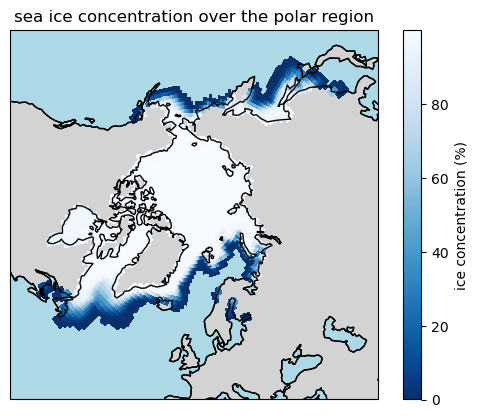

In [14]:
# Generate a map
proj = ccrs.NorthPolarStereo()
ax = plt.subplot(111, projection=proj)
ax.set_global()

# Color over the ocean
ax.add_feature(cartopy_ocean, zorder=1, edgecolor="k", facecolor="lightblue")

# Color over the land
ax.add_feature(cartopy_land, zorder=2, edgecolor="k", facecolor="lightgrey")

# Data
ds["siconc"].isel(time=0).plot.pcolormesh(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="Blues_r",
    cbar_kwargs={"label": "ice concentration (%)"},
    zorder=3,
)

# Add coastlines
ax.coastlines(color="black", zorder=4)

ax.set_extent([-180, 180, 43, 90], ccrs.PlateCarree())
ax.set_title("sea ice concentration over the polar region")

This data is a time series dataset. Let's get an idea how the data evolves in time using interactive visualization. The example script can be found [here](https://hvplot.holoviz.org/reference/xarray/image.html).

#### 2.1.4 (Optional) Visualize the data with interactivity

In [15]:
ds["siconc"].isel(time=slice(0,12)).hvplot.image(
    geo=True,
    project=True,
    width=400,
    coastline=True,  # geoviews needed
    cmap="Blues_r",
    clim=(0, 100),  # colorbar range
)

2024-01-29 10:33:27,476 [WARNING]: parameterized.py(__db_print:3023) >> Due to internal constraints, when aspect and width/height is set, the bokeh backend uses those values as frame_width/frame_height instead. This ensures the aspect is respected, but means that the plot might be slightly larger than anticipated. Set the frame_width/frame_height explicitly to suppress this warning.


BokehModel(combine_events=True, render_bundle={'docs_json': {'edd518ba-d192-4dfd-bb46-d5279f58697f': {'version…

Another angle using example script from [here](https://hvplot.holoviz.org/user_guide/Geographic_Data.html#declaring-an-output-projection):

In [16]:
ds["siconc"].isel(time=slice(0,12)).hvplot.image(
    geo=True,
    projection=ccrs.Orthographic(-90, 60),  # longitude, latitude. Try change 60 to -60 to see Antartica
    project=True,
    global_extent=True, 
    frame_height=540, 
    coastline=True,
    cmap='Blues_r',
    clim=(0, 100),  # colorbar range
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'1838d090-d13e-4f81-8bc6-8e1154edb737': {'version…

The above example demonstrates the first one year of the data. To check different or longer time period, you can consider replacing `ds["siconc"].isel(time=slice(0,12))` part to, for example, `ds["siconc"].sel({"time": slice("1981-01-01", "2010-12-31")})`.

#### 2.1.4 (Optional) Visualize the data with increased interactivity

In [17]:
import lexcube 

da = ds["siconc"]
w = lexcube.Cube3DWidget(da, cmap="Blues_r", vmin=0, vmax=100)
w

Cube3DWidget(api_metadata={'/api': {'status': 'ok', 'api_version': 5}, '/api/datasets': [{'id': 'default', 'sh…

### 2.2 Sea ice extent

Below, we will calculate the sea ice extent from sea ice concentration.

In [18]:
sea_ice_extent = (ds.siconc.where(ds.lat > 0) * 1e-2 * area.areacello * 1e-6).where(ds.siconc > 0.15).sum(("lat", "lon"))

Note for the above line
- where siconc > 0.15: to consider sea ice extent instead of total sea ice area
- multiply 1e-2: to convert percentage (%) to fraction

To learn more about the sea ice extent, see this [article](https://nsidc.org/learn/ask-scientist/what-difference-between-sea-ice-area-and-extent) from NSIDC.

Visualize the sea ice extent time series:

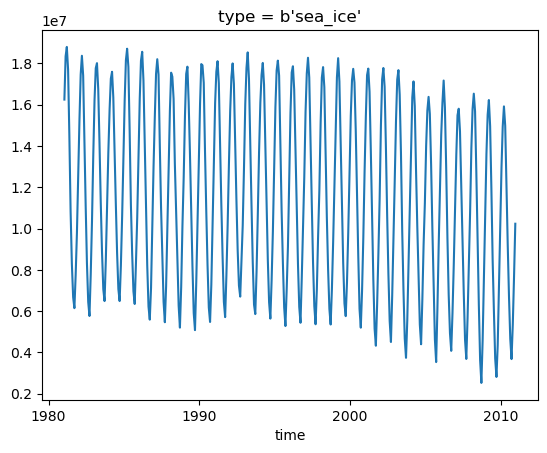

In [19]:
sea_ice_extent.sel({"time": slice("1981-01-01", "2010-12-31")}).plot()

Let's add the `sea_ice_extent` dataArray to the dataset (`ds`) for later use:

In [20]:
ds["extent"] = sea_ice_extent

In [21]:
ds

<xarray.Dataset>
Dimensions:    (time: 1944, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    type       |S7 b'sea_ice'
  * time       (time) object 1850-01-16 12:00:00 ... 2011-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    siconc     (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    extent     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    creation_date:          2023-01-30T21:36:30Z
    data contact:           Sam Stevenson (sstevenson@ucsb.edu)
    ...                     ...
    variant_label:          r1i2p2f1
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.7.0
    references:             Stevenson, S., Huang, X., Zhao, Y., Di Lorenzo, E...
    version:                v20230811
    branch_time_in_parent:  3560.0

## 3. Reference dataset

The observational dataset provided is the satellite derived sea ice concentration dataset from EUMETSAT OSI-SAF. More data information can be found at the [osi-450-a product page](https://osi-saf.eumetsat.int/products/osi-450-a). The path to this data is:
```
/p/user_pub/pmp/demo/sea-ice/EUMETSAT
```

In [22]:
obs_file = "/p/user_pub/pmp/demo/sea-ice/EUMETSAT/OSI-SAF-450-a-3-0/v20231201/ice_conc_nh_ease2-250_cdr-v3p0_198801-202012.nc"
obs_ds = xc.open_dataset(obs_file)

In [23]:
obs_ds

<xarray.Dataset>
Dimensions:                 (xc: 432, yc: 432, time: 396, nv: 2, bnds: 2)
Coordinates:
  * xc                      (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                      (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                     (yc, xc) float32 16.62 16.82 17.02 ... 16.82 16.62
    lon                     (yc, xc) float32 -135.0 -135.1 -135.3 ... 44.87 45.0
  * time                    (time) object 1988-01-16 12:00:00 ... 2020-12-16 ...
Dimensions without coordinates: nv, bnds
Data variables:
    Lambert_Azimuthal_Grid  int32 ...
    ice_conc                (time, yc, xc) float64 ...
    raw_ice_conc_values     (time, yc, xc) float64 ...
    status_flag             (time, yc, xc) float32 ...
    time_bnds               (time, nv) object ...
    xc_bnds                 (xc, bnds) float64 ...
Attributes: (12/43)
    title:                     Monthly Sea Ice Concentration Climate Data Rec...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    geospatial_lat_min:        16.62393
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    ...                        ...
    algorithm:                 SICCI3LF (19V, 37V, 37H)
    references:                Product User Manual v3 (2022),Algorithm Theore...
    contributor_name:          Thomas Lavergne,Atle Soerensen,Rasmus Tonboe,C...
    contributor_role:          PrincipalInvestigator,author,author,author,aut...
    source:                    FCDR of SMMR / SSMI / SSMIS Brightness Tempera...
    product_status:            released

In [24]:
obs_area = 625
obs_sea_ice_extent = (obs_ds.ice_conc.where(obs_ds.lat > 0).where(obs_ds.ice_conc > 0.15) * 1e-2 * obs_area).sum(("xc", "yc"))

Note for the above lines
- obs_area = 625  # area size represented by each grid (625 km^2 = 25 km x 25 km resolution)
- where siconc > 0.15: to consider sea ice extent instead of total sea ice area
- multiply 1e-2: to convert percentage (%) to fraction

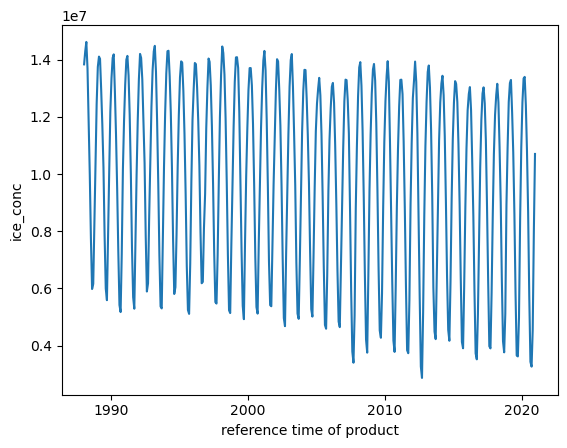

In [25]:
obs_sea_ice_extent.plot()

Let's add the `obs_arctic` dataArray to the dataset (`obs_ds`) for later use:

In [26]:
obs_ds["extent"] = obs_sea_ice_extent

## 4. Analysis: get climatology

We will use [xCDAT](https://xcdat.readthedocs.io)'s [`temporal.climatology`](https://xcdat.readthedocs.io/en/latest/generated/xarray.Dataset.temporal.climatology.html) capability to get climatology field. 

In [27]:
obs_ds_clim = obs_ds.temporal.climatology(
    "extent", freq="month", reference_period=("1981-01-01", "2010-12-31"))



In [28]:
ds_clim = ds.temporal.climatology(
    "extent", freq="month", reference_period=("1981-01-01", "2010-12-31"))


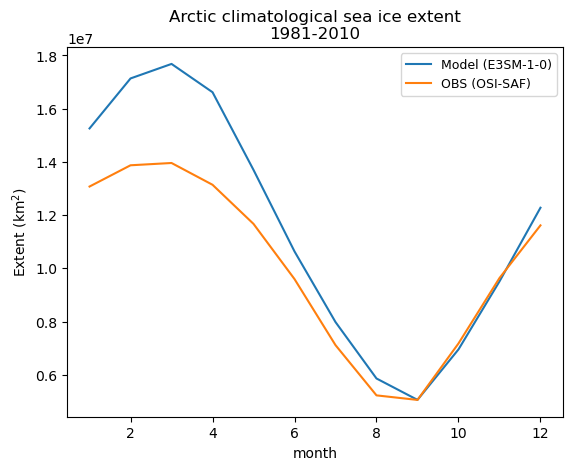

In [29]:
fig, ax = plt.subplots()

# Unify the time axis to plot lines on a same figure
ds_clim["time"] = [x for x in range(1, 13)]
obs_ds_clim["time"] = [x for x in range(1, 13)]

# Add lines
ds_clim["extent"].plot(ax=ax, label="Model (E3SM-1-0)")
obs_ds_clim["extent"].plot(ax=ax, label="OBS (OSI-SAF)")

# Attach legend
plt.title("Arctic climatological sea ice extent\n1981-2010")
plt.xlabel("month")
plt.ylabel("Extent (km${^2}$)")
plt.legend(loc="upper right", fontsize=9)

[Optional] Interactive line plot example can be found [here](https://hvplot.holoviz.org/user_guide/Gridded_Data.html#d-plots).

In [30]:
ds_clim["extent"].hvplot(label="Model") * obs_ds_clim["extent"].hvplot(label="OBS")

:Overlay
   .Curve.Model :Curve   [time]   (extent)
   .Curve.OBS   :Curve   [time]   (extent)

## 4. Evaluation Metrics

The term "Metric" indicates a score or statistics that can represent model's performance on reproducing the observed features. It can be defined in many different ways, but the primary purpose of metrics is to summarize the performances of many different models and provide a framework for the benchmarking.

In this notebook, we define **Mean Square Error (MSE)** and **Temporal MSE** as metrics.

### 4.1 Mean Square Error

In [31]:
mse = (ds_clim["extent"].data.mean() - obs_ds_clim["extent"].data.mean()) ** 2 * 1e-12

In [32]:
print(f"Mean Square Error: {float(mse)} 10^12 km^2")

Mean Square Error: 2.135306264323598 10^12 km^2


### 4.2 Temporal Mean Square Error

In [33]:
tmse = np.sum(((ds_clim["extent"].data - obs_ds_clim["extent"].data) ** 2)) / len(ds_clim["extent"]) * 1e-12

In [34]:
print(f"Temporal Mean Square Error: {float(tmse)} 10^12 km^2")

Temporal Mean Square Error: 4.02078624302466 10^12 km^2
